<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Overview</b></font>


This script tackles the task of predicting house prices, as outlined in the Kaggle competition "House Prices - Advanced Regression Techniques." The challenge involves using 79 explanatory variables to predict the sales prices of houses in Ames, Iowa, emphasizing feature engineering and advanced regression techniques. For more details and the dataset, visit the competition page: [House Prices Competition](https://kaggle.com/competitions/house-prices-advanced-regression-techniques).

In [1]:
import pandas as pd

test_data = pd.read_csv("/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/test.csv")
train_data = pd.read_csv("/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/train.csv")

In [2]:
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

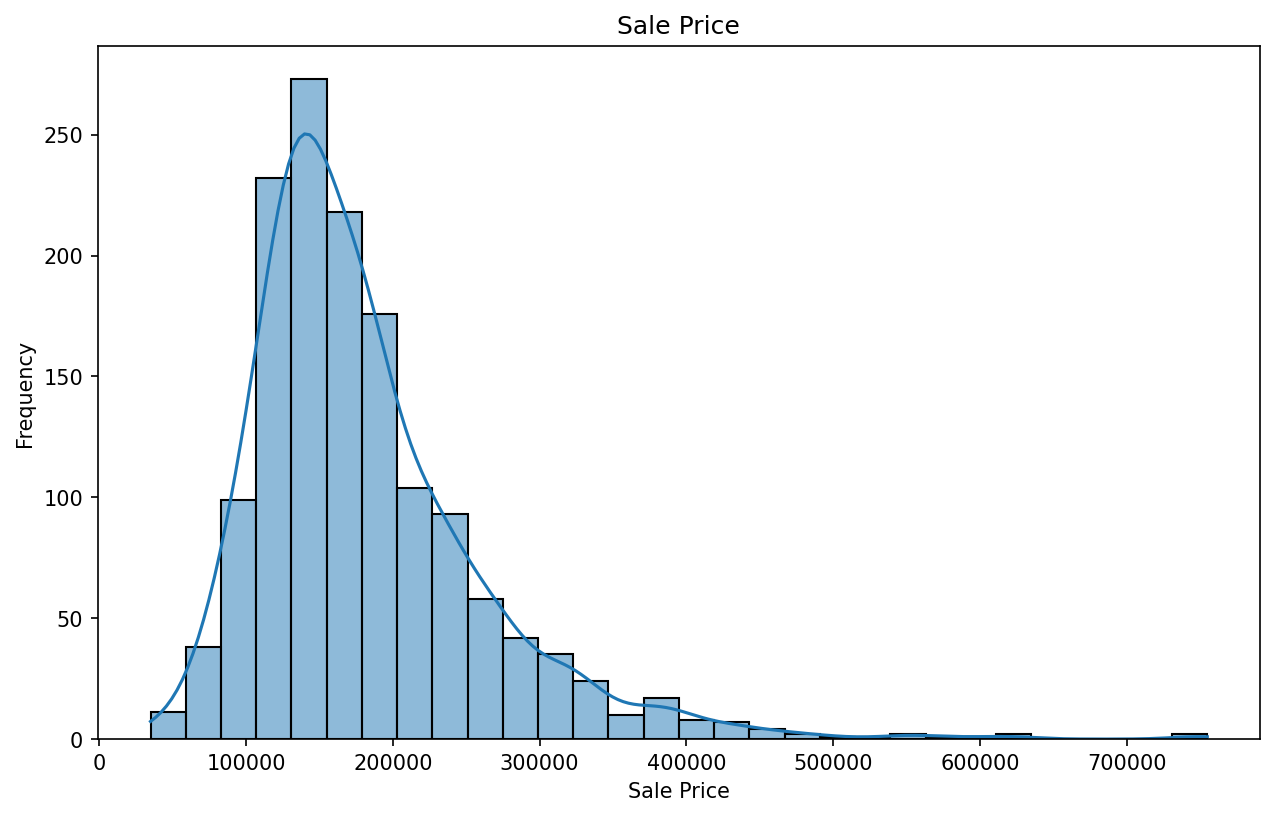

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution of predicted SalePrice
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Ordinary Least Squares</b></font>

<font color='DarkMagenta' size='6' style='line-height: 1.01;'>not a great choice! :)</font>

In [6]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming train_data and test_data are already loaded

# Preprocess Training Data
# Fill in missing values for numerical features
train_data.fillna(train_data.mean(), inplace=True)

# Convert infinite values to NaN and then fill or drop them
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(train_data.mean(), inplace=True)  # or another appropriate method

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data)

# Separate the features and the target variable
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Preprocess Test Data
# Fill in missing values for numerical features
test_data.fillna(test_data.mean(), inplace=True)

# Convert infinite values to NaN and then fill or drop them
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.fillna(test_data.mean(), inplace=True)  # or another appropriate method

# Ensure test_data has the same columns as X_train, add missing columns with default value 0
test_data = pd.get_dummies(test_data)
test_data = test_data.reindex(columns = X_train.columns, fill_value=0)

# Predict the SalePrice for the test data
predictions = model.predict(test_data)


# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": predictions
})

# Specify your desired file path
file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/ols_predictions.csv'

# Save the DataFrame to a CSV file
submission.to_csv(file_path, index=False)

print(f'Submission file has been saved to {file_path}')

Submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/ols_predictions.csv


/var/folders/z3/bkgw4vw17fx7qmlcf7_4tdd00000gn/T/ipykernel_99772/2901733240.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
/var/folders/z3/bkgw4vw17fx7qmlcf7_4tdd00000gn/T/ipykernel_99772/2901733240.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)  # or another appropriate method
/var/folders/z3/bkgw4vw17fx7qmlcf7_4tdd00000gn/T/ipykernel_99772/2901733240.py:30: FutureWarning: The default value of numeric_only in DataFrame

In [7]:
submission

,Id,SalePrice
0,1461,84777.051969
1,1462,133077.512010
2,1463,159028.327963
3,1464,169367.280179
4,1465,177608.441099
...,...,...
1454,2915,58177.352307
1455,2916,53677.427528
1456,2917,153147.487421
1457,2918,89103.162955


In [8]:
# Print the summary of the model
#print(model.summary())

<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Performance on Kaggle</b></font>

This basic OLS (Ordinary Least Squares) prediction model achieved a score of 0.729 in the Kaggle competition's submission segment.

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Random Forest Regressor</b></font>

In [9]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Note: Preprocessing steps for train_data and test_data must have been completed here.

# Assuming train_data and test_data have been preprocessed up to the point of OLS model fitting

# Preparing X_train and y_train for Random Forest, assuming 'SalePrice' is the target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10000, random_state=42)

# Fit the Random Forest model
# Ensure 'Id' and potentially 'const' columns are not included in the model fitting
X_train_rf = X_train.drop(columns=['Id', 'const'], errors='ignore')
rf_model.fit(X_train_rf, y_train)

# Prepare the test data for Random Forest prediction
# Make sure to drop 'Id' and 'const' columns if they were included during OLS preprocessing
test_features_rf = test_data.drop(columns=['Id', 'const'], errors='ignore').reindex(columns=X_train_rf.columns)

# Predict the SalePrice for the test data with the Random Forest model
rf_predictions = rf_model.predict(test_features_rf)


# Prepare the submission DataFrame for Random Forest predictions
rf_submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": rf_predictions
})

# Specify the file path for saving the Random Forest predictions
rf_file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/rf_predictions.csv'

# Save the Random Forest predictions to a CSV file
rf_submission.to_csv(rf_file_path, index=False)

print(f'Random Forest submission file has been saved to {rf_file_path}')


Random Forest submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/rf_predictions.csv


In [10]:
rf_submission

,Id,SalePrice
0,1461,128098.0592
1,1462,155114.7512
2,1463,179867.7041
3,1464,182918.2351
4,1465,198829.9460
...,...,...
1454,2915,85578.4449
1455,2916,86646.8156
1456,2917,151856.5934
1457,2918,113628.4391


<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Model Performance on Kaggle</b></font>

The Random Forest model scored an RMSE of 0.148 in the Kaggle submission, significantly outperforming the OLS model. This lower score reflects a higher accuracy in price predictions.

Top 20 Feature Importances:
OverallQual          0.581959
GrLivArea            0.108598
TotalBsmtSF          0.039313
2ndFlrSF             0.035099
BsmtFinSF1           0.028185
1stFlrSF             0.022178
GarageCars           0.020736
GarageArea           0.014855
LotArea              0.012941
YearBuilt            0.009294
LotFrontage          0.006687
TotRmsAbvGrd         0.006506
YearRemodAdd         0.006442
FullBath             0.005270
MasVnrArea           0.005016
BsmtUnfSF            0.005016
OpenPorchSF          0.004671
WoodDeckSF           0.004555
GarageYrBlt          0.004377
OverallCond          0.004244
BsmtQual_Ex          0.003791
MoSold               0.003242
Fireplaces           0.003192
GarageType_Detchd    0.002229
BsmtQual_Gd          0.001796
ExterQual_Ex         0.001747
BedroomAbvGr         0.001675
KitchenQual_Gd       0.001608
CentralAir_Y         0.001554
MSZoning_RM          0.001541
dtype: float64


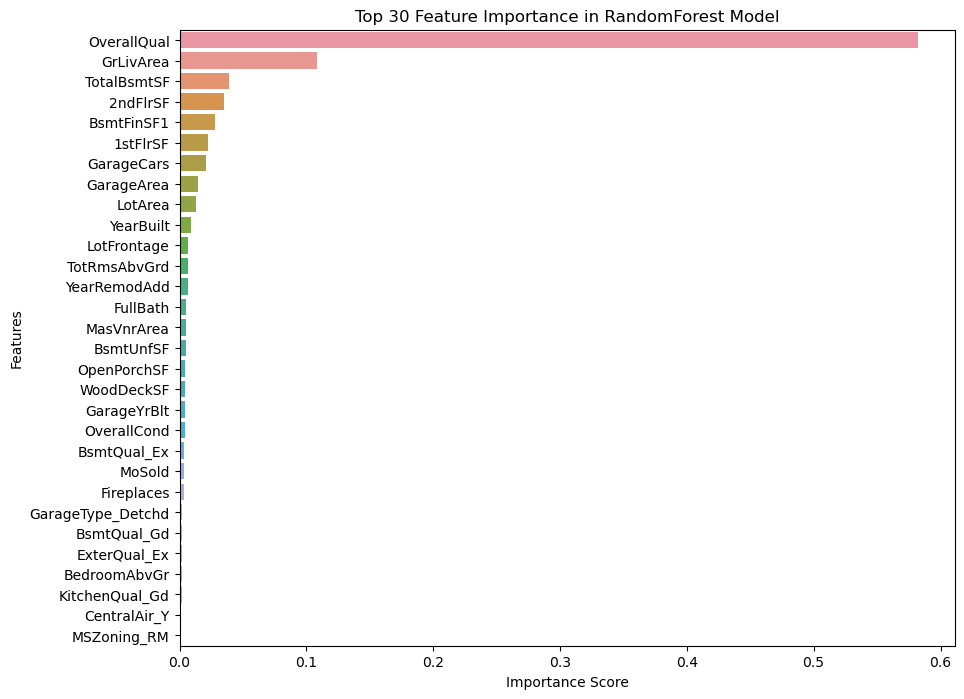

In [11]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a pandas Series to associate feature names with their importance scores
importances = pd.Series(feature_importances, index=X_train_rf.columns)

# Sort the importances in descending order and select the top 30
sorted_importances = importances.sort_values(ascending=False)[:30]

print("Top 20 Feature Importances:")
print(sorted_importances)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index)
plt.title('Top 30 Feature Importance in RandomForest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>XGBRegressor</b></font>

<font color='DarkMagenta' size='6' style='line-height: 1.01;'>a great choice! :)</font>

In [ ]:
Score: 0.1385
model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                     colsample_bytree=1, max_depth=7)

In [24]:
Score: 0.13451
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, gamma=0, subsample=0.75,
                     colsample_bytree=1, max_depth=7)

In [ ]:
Score: 0.13415
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, gamma=0, subsample=0.6, 
    colsample_bytree=0.8, max_depth=10)

In [25]:
from xgboost import XGBRegressor
import pandas as pd

# Assuming train_data and test_data have been preprocessed up to the point of OLS model fitting

# Preparing X_train and y_train for XGBoost, assuming 'SalePrice' is the target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, gamma=0, subsample=0.6, 
    colsample_bytree=0.8, max_depth=10)

# Fit the XGBoost model
# Ensure 'Id' and potentially 'const' columns are not included in the model fitting
X_train_xgb = X_train.drop(columns=['Id', 'const'], errors='ignore')
xgb_model.fit(X_train_xgb, y_train)

# Prepare the test data for XGBoost prediction
# Make sure to drop 'Id' and 'const' columns if they were included during OLS preprocessing
test_features_xgb = test_data.drop(columns=['Id', 'const'], errors='ignore').reindex(columns=X_train_xgb.columns)

# Predict the SalePrice for the test data with the XGBoost model
xgb_predictions = xgb_model.predict(test_features_xgb)

# Prepare the submission DataFrame for XGBoost predictions
xgb_submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": xgb_predictions
})

# Specify the file path for saving the XGBoost predictions
xgb_file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/xgb_predictions.csv'

# Save the XGBoost predictions to a CSV file
xgb_submission.to_csv(xgb_file_path, index=False)

print(f'XGBoost submission file has been saved to {xgb_file_path}')


XGBoost submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/xgb_predictions.csv


In [26]:
xgb_submission

,Id,SalePrice
0,1461,136577.531250
1,1462,160242.015625
2,1463,183571.656250
3,1464,184567.796875
4,1465,199787.218750
...,...,...
1454,2915,82041.304688
1455,2916,78124.218750
1456,2917,157547.343750
1457,2918,117668.593750


<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Model Performance on Kaggle</b></font>

The XGBoost prediction model registered a modest score of 0.13415 in the Kaggle competition.

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Lasso</b></font>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming train_data and test_data are already loaded

# Preprocess Training Data
# Fill in missing values for numerical features
train_data.fillna(train_data.mean(), inplace=True)

# Convert infinite values to NaN and then fill or drop them
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(train_data.mean(), inplace=True)  # or another appropriate method

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data)

# Separate the features and the target variable
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# It's often a good idea to scale your data for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the Lasso model
lasso_model = Lasso(alpha=1)  # You can adjust the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Preprocess Test Data in the same way as Training Data
test_data.fillna(test_data.mean(), inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.fillna(test_data.mean(), inplace=True)
test_data = pd.get_dummies(test_data)
test_data = test_data.reindex(columns = X_train.columns, fill_value=0)

# Don't forget to scale the test data as well
X_test_scaled = scaler.transform(test_data.drop('SalePrice', axis=1, errors='ignore'))  # Ensure 'SalePrice' is not in test data

# Predict the SalePrice for the test data
predictions = lasso_model.predict(X_test_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": predictions
})

# Specify your desired file path
file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/lasso_predictions.csv'

# Save the DataFrame to a CSV file
submission.to_csv(file_path, index=False)

print(f'Submission file has been saved to {file_path}')


In [ ]:
submission

<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Model Performance on Kaggle</b></font>

The Lasso prediction model registered a modest score of 0.189.

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Fine-Tuning Hyperparameters for XGBoost Model in House Price Prediction
</b></font>

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Assuming X_train and y_train are already defined and preprocessed

# Define a range of hyperparameters for the grid search
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.06, 0.08],
    'max_depth': [9, 11],
    'gamma': [0, 0.1],
    'subsample': [0.5,0.6],
    'colsample_bytree': [0.5, 0.8],
}

# Initialize the model
xgb_model = XGBRegressor()

# Setup grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    n_jobs=-1,
    cv=5,
    verbose=3
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best score, converting MSE to RMSE for a more interpretable result
print("Best score:", np.sqrt(-grid_search.best_score_))

best_model = grid_search.best_estimator_


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_depth=9, n_estimators=500, subsample=0.6;, score=-568373615.844 total time=   1.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_depth=9, n_estimators=1000, subsample=0.6;, score=-862679786.108 total time=   4.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_depth=11, n_estimators=500, subsample=0.6;, score=-1385907156.356 total time=   2.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_depth=11, n_estimators=1000, subsample=0.6;, score=-1385861821.866 total time=   5.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.08, max_depth=9, n_estimators=500, subsample=0.6;, score=-609319061.040 total time=   2.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.08, max_depth=9, n_estimators=1000, subsample=0.6;, score=-609336946.301 total time=   4.1s
[CV 1/5] END colsample_by

/Users/dadmehr/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 2, 'n_estimators': 1300, 'subsample': 0.6}
Best score: 25464.451308619082